In [19]:
# Regular EDA (exploration data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
import pandas as pd

# Load dataset from CSV file
file_path = "C:/Users/Apdione/.vscode/dataset/pokemon.csv"  # Ganti dengan path file CSV Anda
try:
    pokemon_df = pd.read_csv(file_path)
    print("File CSV berhasil dimuat.")
except FileNotFoundError:
    print("File CSV tidak ditemukan. Pastikan path sudah benar.")
    exit()

File CSV berhasil dimuat.


In [35]:
# Deskripsi dataset
print("\nInformasi Dataset:")
print(pokemon_df.info())
print("\nDeskripsi Statistik:")
print(pokemon_df.describe())
print("\nJumlah Nilai Unik per Kolom:")
print(pokemon_df.nunique())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB
None

Deskripsi Statistik:
            number        total           hp       attack      defense  \
count  1072.000000  1072.000000  1072.000000  1072.000000  1072.000000   
mean    445.219216   440.885261    70

In [36]:
# Tampilkan beberapa baris data
print(pokemon_df.head())
print(pokemon_df.tail())

   number                 name  type1   type2  total  hp  attack  defense  \
0       1            Bulbasaur  Grass  Poison    318  45      49       49   
1       2              Ivysaur  Grass  Poison    405  60      62       63   
2       3             Venusaur  Grass  Poison    525  80      82       83   
3       3        Mega Venusaur  Grass  Poison    625  80     100      123   
4       3  Gigantamax Venusaur  Grass  Poison    525  80      82       83   

   sp_attack  sp_defense  speed  generation  legendary  
0         65          65     45           1      False  
1         80          80     60           1      False  
2        100         100     80           1      False  
3        122         120     80           1      False  
4        100         100     80           1      False  
      number                  name    type1  type2  total   hp  attack  \
1067     896             Glastrier      Ice    NaN    580  100     145   
1068     897             Spectrier    Ghost    

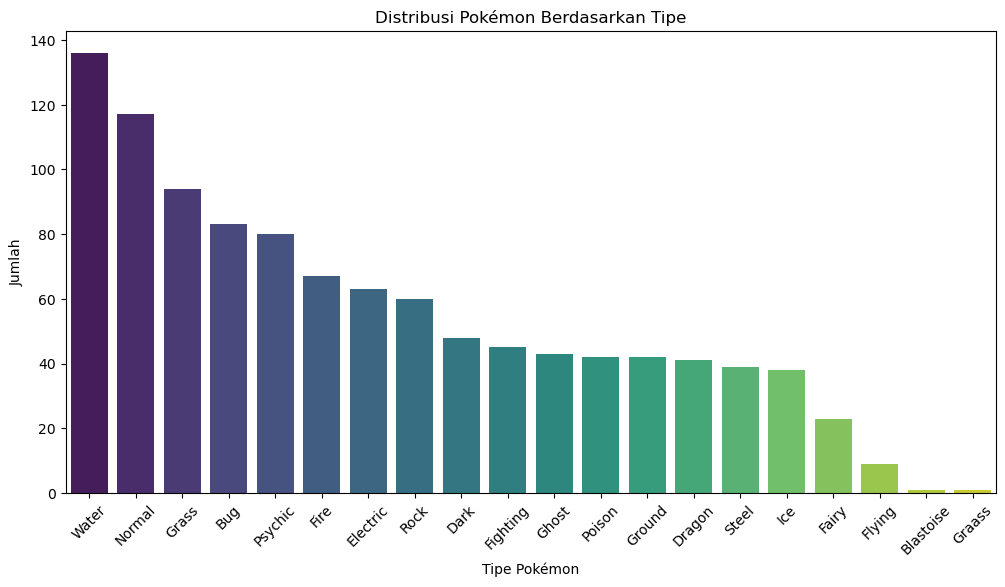

In [22]:
# Cek jumlah Pokémon per tipe
if 'type1' in pokemon_df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=pokemon_df, x='type1', order=pokemon_df['type1'].value_counts().index, palette='viridis')
    plt.xlabel("Tipe Pokémon")
    plt.ylabel("Jumlah")
    plt.title("Distribusi Pokémon Berdasarkan Tipe")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Kolom 'type1' tidak ditemukan dalam dataset.")

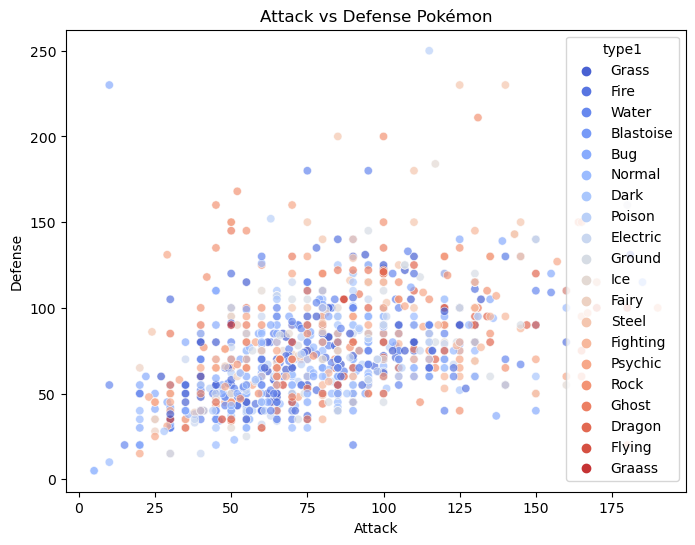

In [23]:




# Scatter plot Attack vs Defense
if 'attack' in pokemon_df.columns and 'defense' in pokemon_df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=pokemon_df, x='attack', y='defense', hue='type1', palette='coolwarm', alpha=0.7)
    plt.xlabel("Attack")
    plt.ylabel("Defense")
    plt.title("Attack vs Defense Pokémon")
    plt.show()
else:
    print("Kolom 'attack' atau 'defense' tidak ditemukan dalam dataset.")




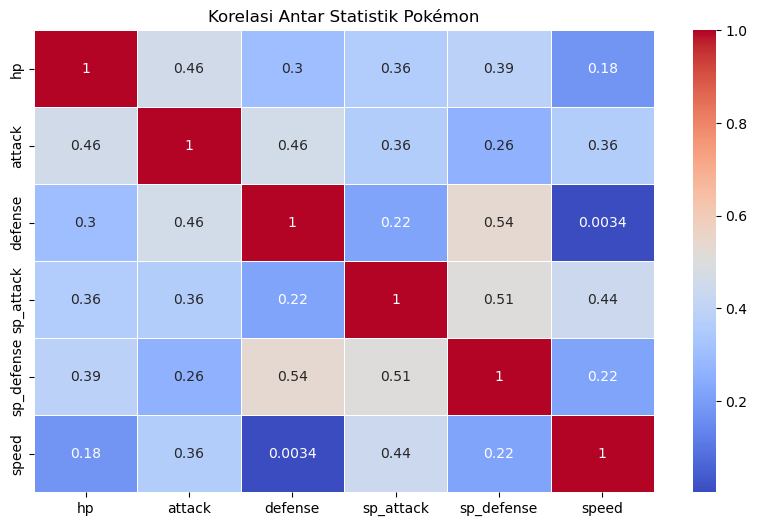

In [24]:
# Heatmap korelasi antar statistik Pokémon
numeric_columns = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
if all(col in pokemon_df.columns for col in numeric_columns):
    plt.figure(figsize=(10, 6))
    sns.heatmap(pokemon_df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Korelasi Antar Statistik Pokémon")
    plt.show()
else:
    print("Beberapa kolom statistik tidak ditemukan dalam dataset.")


Data Pokémon Legendary:
      number                  name     type1   type2  total   hp  attack  \
194      144              Articuno       Ice  Flying    580   90      85   
195      144     Galarian Articuno   Psychic  Flying    580   90      85   
196      145                Zapdos  Electric  Flying    580   90      90   
197      145       Galarian Zapdos  Fighting  Flying    580   90     125   
198      146               Moltres      Fire  Flying    580   90     100   
...      ...                   ...       ...     ...    ...  ...     ...   
1067     896             Glastrier       Ice     NaN    580  100     145   
1068     897             Spectrier     Ghost     NaN    580  100      65   
1069     898               Calyrex   Psychic   Grass    500  100      80   
1070     898     Ice Rider Calyrex   Psychic     Ice    680  100     165   
1071     898  Shadow Rider Calyrex   Psychic   Ghost    680  100      85   

      defense  sp_attack  sp_defense  speed  
194       100   

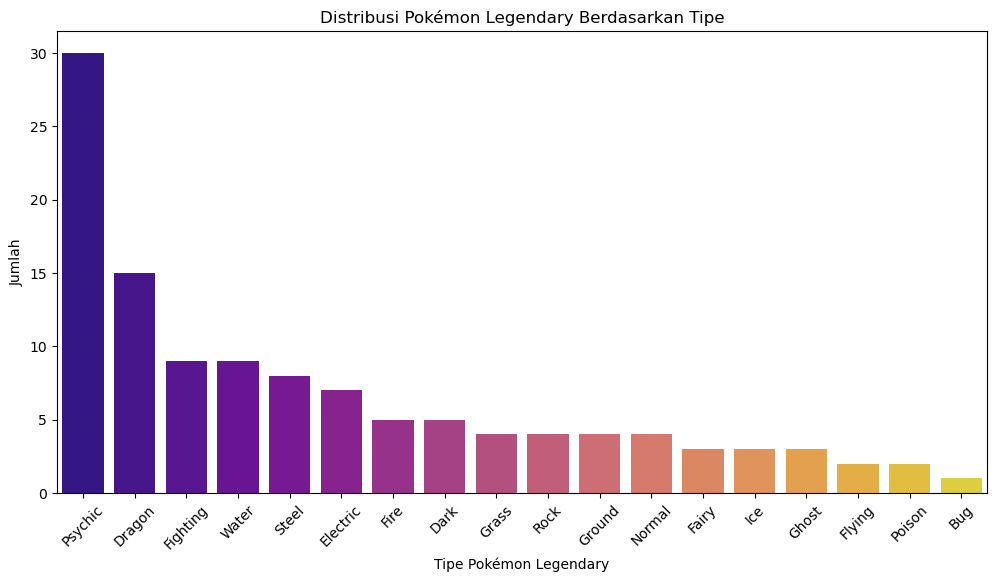

In [25]:
# Menampilkan data Pokémon Legendary
if 'legendary' in pokemon_df.columns:
    legendary_pokemon = pokemon_df[pokemon_df['legendary'] == True]
    print("\nData Pokémon Legendary:")
    print(legendary_pokemon[['number', 'name', 'type1', 'type2', 'total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']])
    
    plt.figure(figsize=(12, 6))
    sns.countplot(data=legendary_pokemon, x='type1', order=legendary_pokemon['type1'].value_counts().index, palette='plasma')
    plt.xlabel("Tipe Pokémon Legendary")
    plt.ylabel("Jumlah")
    plt.title("Distribusi Pokémon Legendary Berdasarkan Tipe")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Kolom 'legendary' tidak ditemukan dalam dataset.")

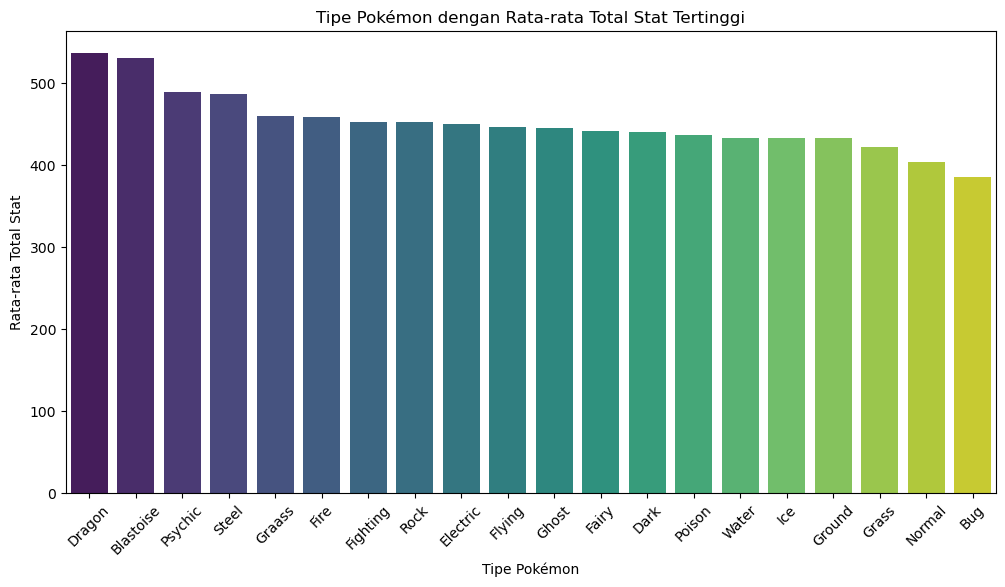

In [26]:
type_avg = pokemon_df.groupby('type1')['total'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=type_avg.index, y=type_avg.values, palette='viridis')
plt.xlabel("Tipe Pokémon")
plt.ylabel("Rata-rata Total Stat")
plt.title("Tipe Pokémon dengan Rata-rata Total Stat Tertinggi")
plt.xticks(rotation=45)
plt.show()


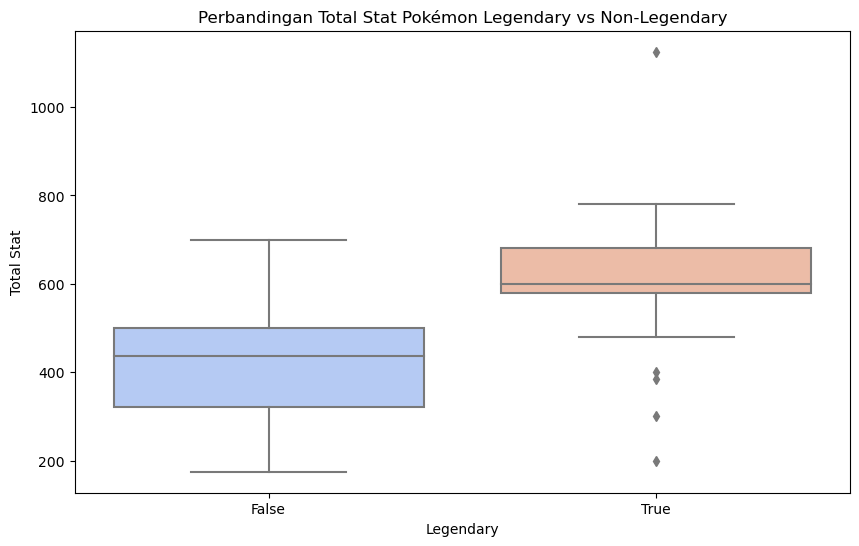

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pokemon_df, x='legendary', y='total', palette='coolwarm')
plt.xlabel("Legendary")
plt.ylabel("Total Stat")
plt.title("Perbandingan Total Stat Pokémon Legendary vs Non-Legendary")
plt.show()



10 Pokémon dengan Total Stat Tertinggi:
      number                            name     type1     type2  total
1057     890             Eternamax Eternatus    Poison    Dragon   1125
204      150                   Mega Mewtwo X   Psychic  Fighting    780
205      150                   Mega Mewtwo Y   Psychic       NaN    780
471      384                   Mega Rayquaza    Dragon    Flying    780
467      382                   Primal Kyogre     Water       NaN    770
469      383                  Primal Groudon    Ground      Fire    770
942      800                  Ultra Necrozma   Psychic    Dragon    754
597      493                          Arceus    Normal       NaN    720
1053     888      Zacian Crowned Sword Forme     Fairy     Steel    720
1055     889  Zamazenta Crowned Sheild Forme  Fighting     Steel    720


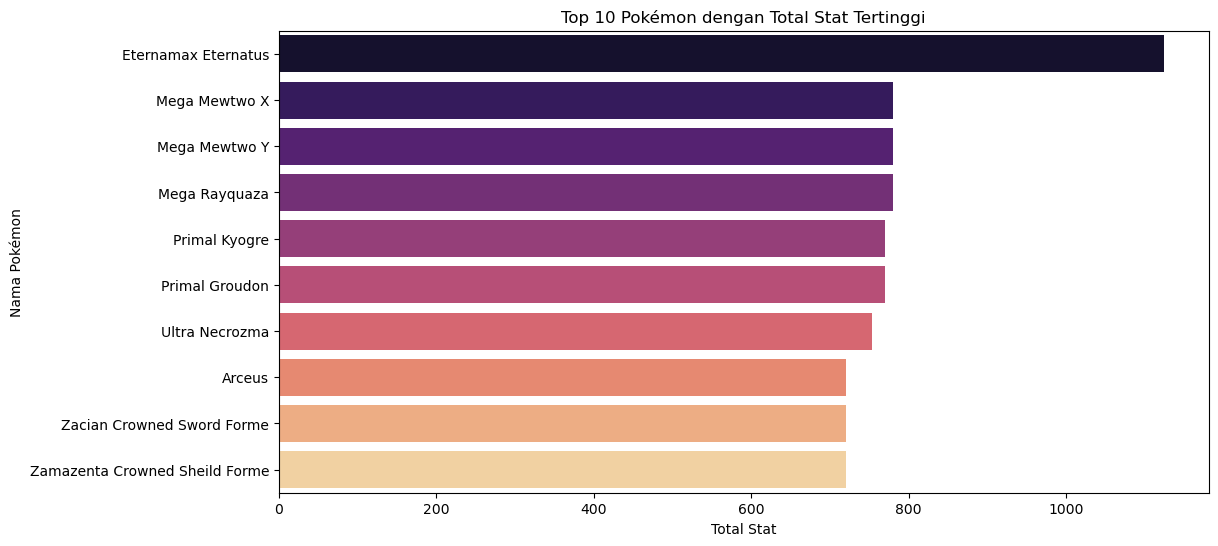

In [ ]:
#Menampilkan 10 pokemon yang memiliki status tertinggi
top_stat_pokemon = pokemon_df.nlargest(10, 'total')
print("\n10 Pokémon dengan Total Stat Tertinggi:")
print(top_stat_pokemon[['number', 'name', 'type1', 'type2', 'total']])
top_pokemon = pokemon_df.nlargest(10, 'total')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_pokemon, y='name', x='total', palette='magma')
plt.xlabel("Total Stat")
plt.ylabel("Nama Pokémon")
plt.title("Top 10 Pokémon dengan Total Stat Tertinggi")
plt.show()



10 Pokémon dengan Total Stat Terendah:
      number                   name    type1   type2  total
883      746  Wishiwashi Solo Forme    Water     NaN    175
247      191                Sunkern    Grass     NaN    180
971      824                Blipbug      Bug     NaN    180
1031     872                   Snom      Ice     Bug    185
367      298                Azurill   Normal   Fairy    190
491      401              Kricketot      Bug     NaN    194
16        10               Caterpie      Bug     NaN    195
20        13                 Weedle      Bug  Poison    195
333      265                Wurmple      Bug     NaN    195
348      280                  Ralts  Psychic   Fairy    198


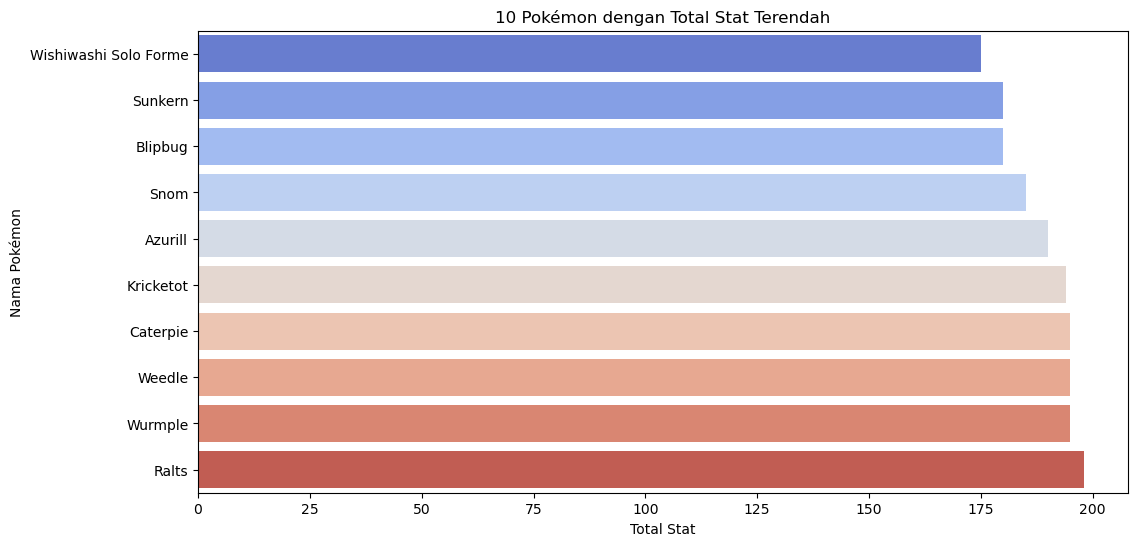

In [29]:
# Menampilkan Pokémon dengan Total Stat Terendah
lowest_stat_pokemon = pokemon_df.nsmallest(10, 'total')
print("\n10 Pokémon dengan Total Stat Terendah:")
print(lowest_stat_pokemon[['number', 'name', 'type1', 'type2', 'total']])

plt.figure(figsize=(12, 6))
sns.barplot(data=lowest_stat_pokemon, y='name', x='total', palette='coolwarm')
plt.xlabel("Total Stat")
plt.ylabel("Nama Pokémon")
plt.title("10 Pokémon dengan Total Stat Terendah")
plt.show()

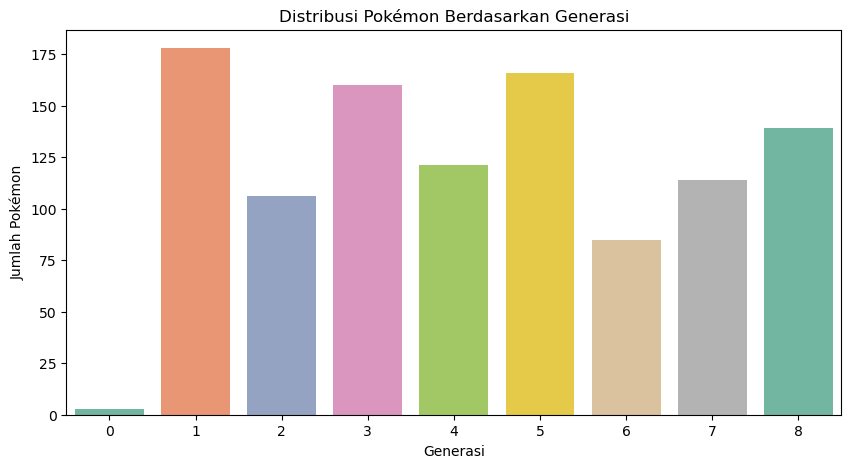

In [30]:
# Distribusi Pokémon Berdasarkan Generasi
if 'generation' in pokemon_df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=pokemon_df, x='generation', palette='Set2')
    plt.xlabel("Generasi")
    plt.ylabel("Jumlah Pokémon")
    plt.title("Distribusi Pokémon Berdasarkan Generasi")
    plt.show()
else:
    print("Kolom 'generation' tidak ditemukan dalam dataset.")